# Kaggle course : data cleaning

### Resume : 

In [21]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
print("Setup complete")

Setup complete


In [22]:
nfl_data = pd.read_csv("data/data_cleaning/NFL Play by Play 2009-2016 (v3).csv")

# setting seed for reproducibility
np.random.seed(0)

nfl_data.describe()

/var/folders/91/nrm9pp9d6kgglf9nqqp32ryr0000gn/T/ipykernel_13648/3798991714.py:1: DtypeWarning: Columns (25,51) have mixed types. Specify dtype option on import or set low_memory=False.
  nfl_data = pd.read_csv("data/data_cleaning/NFL Play by Play 2009-2016 (v3).csv")


,GameID,Drive,qtr,down,TimeUnder,TimeSecs,PlayTimeDiff,yrdln,yrdline100,ydstogo,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
count,3.624470e+05,362447.000000,362447.000000,308229.000000,362447.000000,362259.000000,362073.000000,361724.000000,361724.000000,362447.000000,...,141713.000000,340504.000000,340504.000000,339087.000000,339087.000000,340454.000000,357630.000000,141709.000000,141491.000000,362447.000000
mean,2.012664e+09,12.347088,2.578231,2.001226,7.386076,1695.234346,20.574649,28.413542,48.616807,7.305236,...,-0.386522,0.533889,0.466561,0.534217,0.466185,0.501311,0.002163,0.015209,-0.010492,2012.522071
std,2.292258e+06,7.168173,1.130259,1.006003,4.642132,1063.065717,18.030486,13.002355,25.161965,4.863445,...,1.972964,0.286415,0.286468,0.288647,0.288694,0.288207,0.045326,0.056422,0.067972,2.290084
min,2.009091e+09,1.000000,1.000000,1.000000,0.000000,-900.000000,0.000000,1.000000,1.000000,0.000000,...,-14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.997214,-0.999881,-0.986673,2009.000000
25%,2.011091e+09,6.000000,2.000000,1.000000,3.000000,778.000000,5.000000,20.000000,30.000000,3.000000,...,-0.964562,0.323129,0.230595,0.319464,0.226867,0.274964,-0.014589,-0.011355,-0.018623,2011.000000
50%,2.013091e+09,12.000000,3.000000,2.000000,7.000000,1800.000000,17.000000,30.000000,49.000000,9.000000,...,0.000000,0.531286,0.469040,0.533689,0.466617,0.504349,0.000000,0.003557,0.000000,2013.000000
75%,2.015091e+09,18.000000,4.000000,3.000000,11.000000,2585.000000,37.000000,39.000000,70.000000,10.000000,...,0.484913,0.770011,0.677566,0.773729,0.681018,0.726995,0.014800,0.035702,0.011371,2015.000000
max,2.017010e+09,35.000000,5.000000,4.000000,15.000000,3600.000000,943.000000,50.000000,99.000000,50.000000,...,9.559834,1.000000,1.000000,1.000000,1.000000,1.000000,0.994848,0.994848,1.000000,2016.000000


In [23]:
# number of NA cells for each column
missing_values_per_cols = nfl_data.isnull().sum()
missing_values_per_cols[10:12]

# total cells (number_row * number_cols)
total_cells = np.prod(nfl_data.shape)

# total missing cells 
total_empty_cells = missing_values_per_cols.sum()
print(f"{(total_empty_cells / total_cells) * 100:.2f} % of the cells are empty")


27.65 % of the cells are empty


## Handling missing values

### Before handling missing data, its important to know why the data is missing 

<li>Some cells are empty because the value don't exist -> can add a third value (ex: PenalizedTeam will be NA for both if no teams were penalized in the match. Replacing 'NA' with 'neither' for example can be benefic)</li> <br>

<li>Some cells are empty because they were not recorded -> need to estimate them <strong>imputation</strong></li>

#### Option 1 : dropping missing values

In [24]:
# remove all rows that contain a missing value 
nfl_data.dropna()

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season


In [25]:
# remove all columns with at least one missing value
columns_with_na_dropped = nfl_data.dropna(axis='columns')
columns_with_na_dropped.head()

,Date,GameID,Drive,qtr,TimeUnder,ydstogo,ydsnet,PlayAttempted,Yards.Gained,sp,...,AwayTeam,Timeout_Indicator,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,ExPoint_Prob,TwoPoint_Prob,Season
0,2009-09-10,2009091000,1,1,15,0,0,1,39,0,...,TEN,0,3,3,3,3,3,0.0,0.0,2009
1,2009-09-10,2009091000,1,1,15,10,5,1,5,0,...,TEN,0,3,3,3,3,3,0.0,0.0,2009
2,2009-09-10,2009091000,1,1,15,5,2,1,-3,0,...,TEN,0,3,3,3,3,3,0.0,0.0,2009
3,2009-09-10,2009091000,1,1,14,8,2,1,0,0,...,TEN,0,3,3,3,3,3,0.0,0.0,2009
4,2009-09-10,2009091000,1,1,14,8,2,1,0,0,...,TEN,0,3,3,3,3,3,0.0,0.0,2009


In [26]:
print(f"Columns in original dataset: {nfl_data.shape[1]}")
print(f"Columns with na's dropped: {columns_with_na_dropped.shape[1]}")

Columns in original dataset: 102
Columns with na's dropped: 37


#### Option 2 : Filling in missing values automatically

In [27]:
# get a small subset of the NFL dataset
subset_nfl_data = nfl_data.loc[:, 'EPA':'Season'].head()
subset_nfl_data.head(3)

,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,NaN,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,-1.402760,NaN,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009


In [28]:
subset_nfl_data.fillna(0).head(3)

,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,0.000000,0.000000,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,0.000000,0.000000,2009
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,-1.402760,0.000000,0.000000,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,0.000000,0.000000,2009


In [29]:
# replace all NA's the value that comes directly after it in the same column, 
# then replace all the remaining na's with 0
subset_nfl_data.fillna(method='bfill', axis=0).fillna(0).head(3)

/var/folders/91/nrm9pp9d6kgglf9nqqp32ryr0000gn/T/ipykernel_13648/4262574867.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset_nfl_data.fillna(method='bfill', axis=0).fillna(0).head(3)


,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,-1.068169,1.146076,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,-0.032244,0.036899,2009
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,-1.402760,3.318841,-5.031425,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,0.106663,-0.156239,2009


## Scaling and Normalization

<li>scaling is modifying the range of data</li>
<li>normalization is changing the shape of the distribution of the data</li>

### scaling

In [30]:
from mlxtend.preprocessing import minmax_scaling

(1000,)


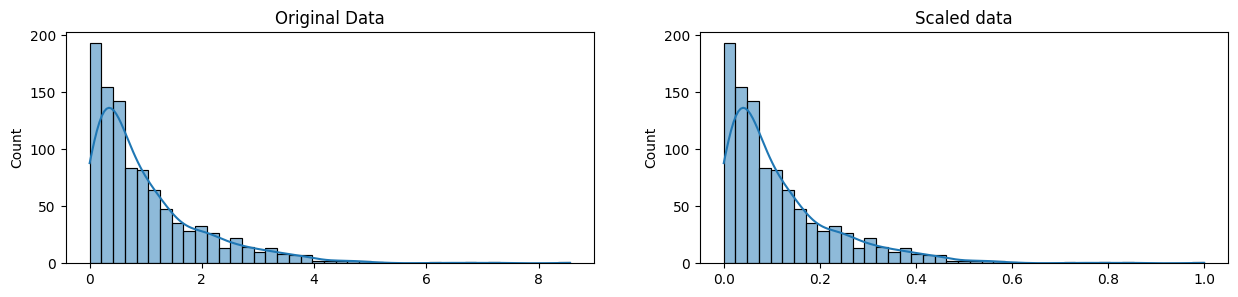

In [31]:
original_data = np.random.exponential(size=1000)
print(original_data.shape)
# mix-max scale the data between 0 and 1
scaled_data = minmax_scaling(original_data, columns=[0])

# plot both together to compare
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(scaled_data, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Scaled data")
plt.show()

### normalization 

The point of normalization is to change your observations so that they can be described as a normal distribution.

In [32]:
from scipy import stats

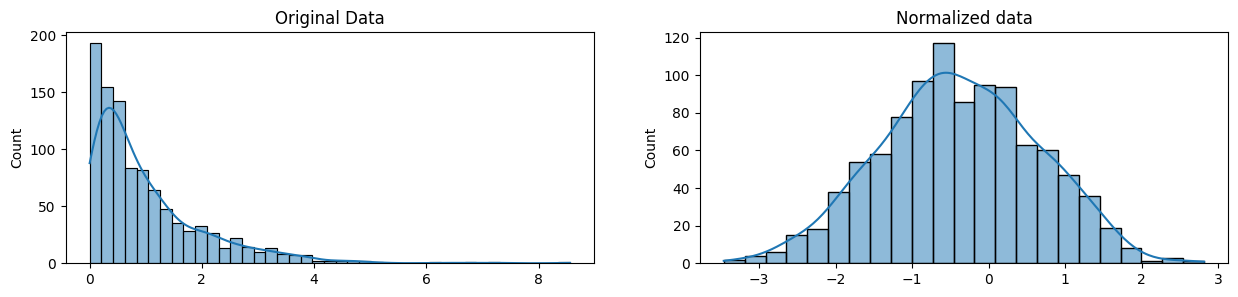

In [33]:
# normalize the exponential data with boxcox
normalized_data = stats.boxcox(original_data)[0]

# plot both together to compare
fig, ax=plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(normalized_data, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Normalized data")
plt.show()

## Parsing dates

In [34]:
import datetime

landslides = pd.read_csv("data/data_cleaning/catalog.csv")

np.random.seed(0)

print(landslides["date"].head()) # date is of type 'object'


0     3/2/07
1    3/22/07
2     4/6/07
3    4/14/07
4    4/15/07
Name: date, dtype: object


In [35]:
# pandas has a 'datetime64' type

# converting date columns ('object') to datetime
landslides["parsed_date"] = pd.to_datetime(
    landslides["date"], 
    format="%m/%d/%y",
    # infer_datetime_format=True # much slower that specifying the format and parsing can be wrong if data entries are weird
    )

landslides["parsed_date"].head()

0   2007-03-02
1   2007-03-22
2   2007-04-06
3   2007-04-14
4   2007-04-15
Name: parsed_date, dtype: datetime64[ns]

<Axes: xlabel='parsed_date', ylabel='Count'>

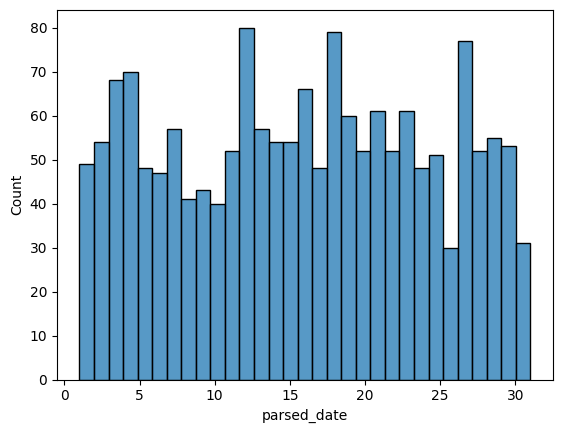

In [36]:
day_of_month_landslides = landslides["parsed_date"].dt.day

day_of_month_landslides = day_of_month_landslides.dropna()

# plot the day of the month
sns.histplot(day_of_month_landslides, kde=False, bins=31)

## Datetime handling example

In [37]:
earthquakes = pd.read_csv("data/data_cleaning/earthquakes.csv")

In [38]:
# date format used in not consistent in all cells !
date_lengths = earthquakes["Date"].str.len()
date_lengths.value_counts() # get the distribution of date lengths

# getting the indices of the 3 rows where datetime format is different
mask = earthquakes["Date"].str.len() == 24
indices = earthquakes["Date"].index[mask]

print('Indices with corrupted data:', indices)
# earthquakes.loc[indices]

# modifying those few rows manually 
earthquakes.loc[3378, "Date"] = "02/23/1975"
earthquakes.loc[7512, "Date"] = "04/28/1985"
earthquakes.loc[20650, "Date"] = "03/13/2011"

# parsing the date as they now all have same format
earthquakes['date_parsed'] = pd.to_datetime(earthquakes['Date'], format="%m/%d/%Y")

Indices with corrupted data: Index([3378, 7512, 20650], dtype='int64')


#### plotting the days distribution of earthquakes

<Axes: title={'center': 'Distribution of days for earthquakes'}, xlabel='Months', ylabel='Quantity of earthquakes Q'>

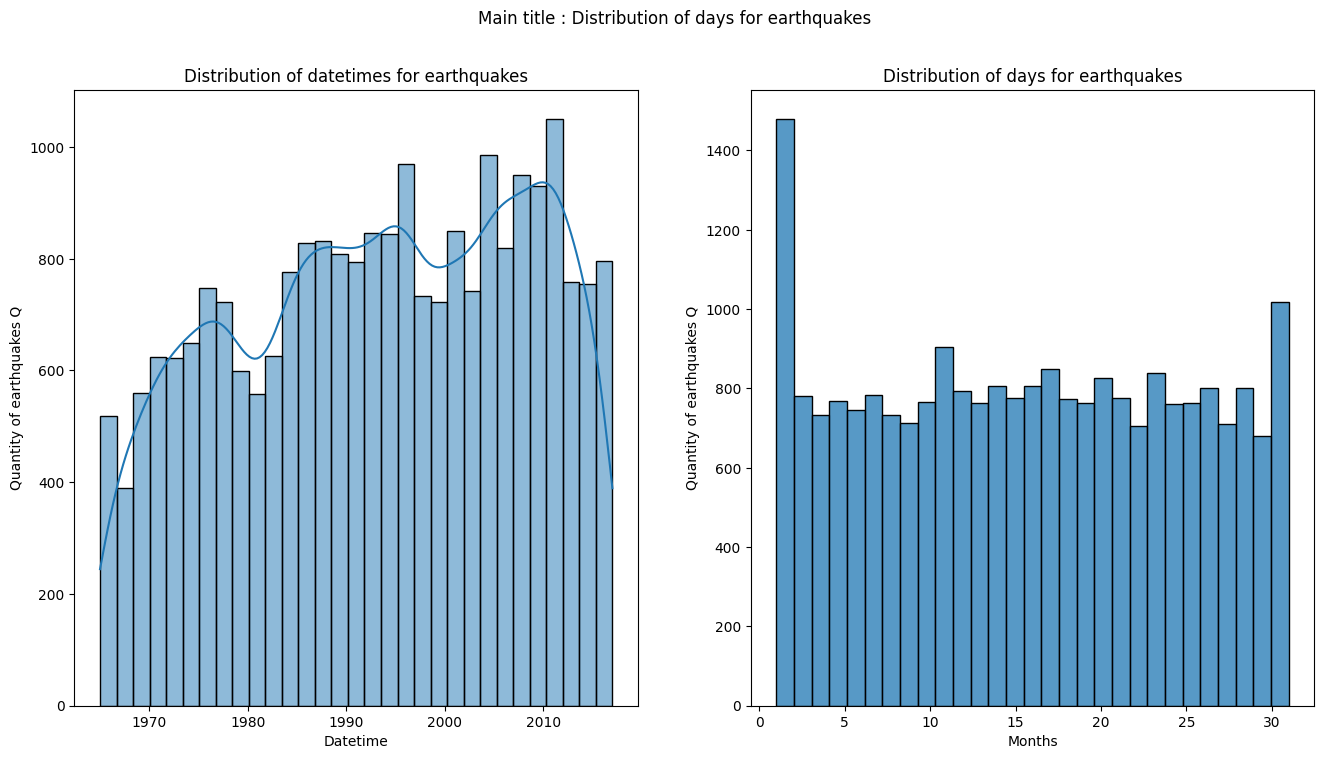

In [39]:
day_of_month_earthquakes = earthquakes["date_parsed"].dt.day

date_earthquakes = earthquakes["date_parsed"]


fig, ax = plt.subplots(1,2, figsize=(16,8))
fig.suptitle("Main title : Distribution of days for earthquakes")

# first graph
ax[0].set_title("Distribution of datetimes for earthquakes")
ax[0].set_ylabel("Quantity of earthquakes Q")
ax[0].set_xlabel("Datetime")
sns.histplot(date_earthquakes, kde=True, legend = False, ax=ax[0])

# second graph
ax[1].set_title("Distribution of days for earthquakes")
ax[1].set_ylabel("Quantity of earthquakes Q")
ax[1].set_xlabel("Months")
sns.histplot(day_of_month_earthquakes, kde=False, legend = True, ax=ax[1])

## Character encoding

In [42]:
before = "This is the euro symbol: €"

# check to see what datatype it is
type(before)



after = before.encode("utf-8", errors="replace")

# check the type
type(after)

decoded = after.decode('utf-8') #'ascii' will throw an error because of the '€' character
print(decoded)
print(after)

This is the euro symbol: €
b'This is the euro symbol: \xe2\x82\xac'


#### detecting the encoding type of a file : using charset_normalizer module

In [43]:
# detecting the encoding of a file 
import charset_normalizer

filepath = "data/data_cleaning/earthquakes.csv"

with open(filepath,'rb') as rawdata:
    result = charset_normalizer.detect(rawdata.read(100000))

print(result) # result : {'encoding': 'ascii', 'language': 'English', 'confidence': 1.0}

{'encoding': 'ascii', 'language': 'English', 'confidence': 1.0}


In [44]:
# so the file should be decoded using ascii or the default value of utf-8
earthquakes_ascii = pd.read_csv(filepath, encoding="ascii")
earthquakes_utf8 = pd.read_csv(filepath)
# earthquakes_ascii.head(3)
earthquakes_utf8.head(3)

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic


#### writing a dataframe to a file : df.to_csv("output_path.csv", encoding)

In [45]:
earthquakes.to_csv("data/data_cleaning/output/out_earthquakes.csv",encoding="utf-8") # utf 8 is the default encoding value for reading and writing

## Inconsitent Data Entry

In [46]:
professors = pd.read_csv("data/data_cleaning/pakistan_intellectual_capital.csv")

In [48]:
import rapidfuzz 


countries = professors['Country'].unique()
countries.sort()
countries

array([' Germany', ' New Zealand', ' Sweden', ' USA', 'Australia',
       'Austria', 'Canada', 'China', 'Finland', 'France', 'Greece',
       'HongKong', 'Ireland', 'Italy', 'Japan', 'Macau', 'Malaysia',
       'Mauritius', 'Netherland', 'New Zealand', 'Norway', 'Pakistan',
       'Portugal', 'Russian Federation', 'Saudi Arabia', 'Scotland',
       'Singapore', 'South Korea', 'SouthKorea', 'Spain', 'Sweden',
       'Thailand', 'Turkey', 'UK', 'USA', 'USofA', 'Urbana', 'germany'],
      dtype=object)

In [168]:
professors['Country'] = professors['Country'].str.lower()
# remove trailing white spaces
professors['Country'] = professors['Country'].str.strip()

In [150]:
matches = rapidfuzz.process.extract("south korea", countries, limit=10, scorer=rapidfuzz.fuzz.token_sort_ratio)
matches

[('south korea', 100.0, 24),
 ('southkorea', 47.61904761904761, 25),
 ('saudi arabia', 43.47826086956522, 21),
 ('norway', 35.29411764705882, 17),
 ('austria', 33.333333333333336, 1),
 ('ireland', 33.333333333333336, 9),
 ('pakistan', 31.57894736842105, 18),
 ('portugal', 31.57894736842105, 19),
 ('scotland', 31.57894736842105, 22),
 ('australia', 30.000000000000004, 0)]

In [171]:
def compute_matching_scores(df, column, string_to_match, rf_word_limit = 10):
    strings_to_evaluate = df[column].unique()
    return rapidfuzz.process.extract(string_to_match,strings_to_evaluate, limit=rf_word_limit, scorer=rapidfuzz.fuzz.token_sort_ratio)


def replace_matches_in_column(df, column, string_to_match, min_score = 46, rf_word_limit = 10):

    strings_to_evaluate = df[column].unique()
    matches = rapidfuzz.process.extract(string_to_match, strings_to_evaluate, limit=rf_word_limit, scorer=rapidfuzz.fuzz.token_sort_ratio)

    close_matches = [match[0] for match in matches if match[1] >= min_score]

    rows_with_matches = df[column].isin(close_matches)

    df.loc[rows_with_matches, column] = string_to_match



In [169]:
# compute_matching_scores(professors, column='Country',string_to_match="south korea")
replace_matches_in_column(professors, column='Country',string_to_match="south korea")

In [166]:
cleaned_countires = professors['Country'].unique()
print(cleaned_countires)

['thailand' 'pakistan' 'germany' 'austria' 'australia' 'uk' 'china'
 'france' 'usofa' 'south korea' 'malaysia' 'sweden' 'italy' 'canada'
 'norway' 'ireland' 'new zealand' 'urbana' 'portugal' 'russian federation'
 'usa' 'finland' 'netherland' 'greece' 'turkey' 'macau' 'singapore'
 'spain' 'japan' 'hongkong' 'saudi arabia' 'mauritius' 'scotland']
